##### Гистограммы, разбиения по интервалам и плотность

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data = np.random.randn(1000)

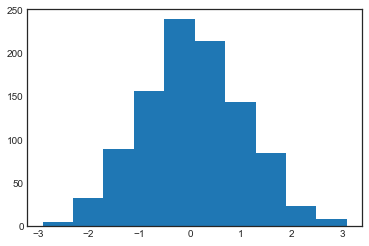

In [2]:
plt.hist(data);

С более детальными настройками

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


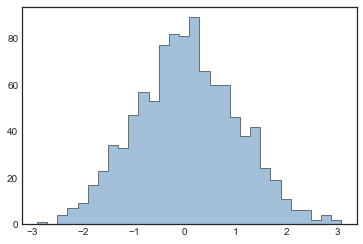

In [3]:
plt.hist(data, bins=30, normed=False, alpha=0.5, 
        histtype='stepfilled', color='steelblue',
        edgecolor='k');

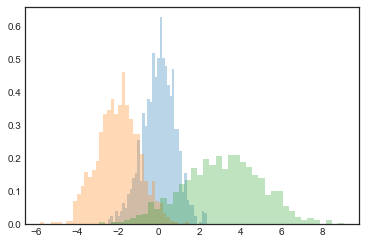

In [4]:
# сравним несколько распределений
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype = 'stepfilled', alpha = 0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Чтобы вычислить гистограмму и не отображать ее (т.е. подсчитать кол-во точек в заданном инервале) - np.histogram()

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 38 247 455 229  31]


In [6]:
print(bin_edges)

[-2.90753859 -1.70913946 -0.51074032  0.68765882  1.88605795  3.08445709]


In [7]:
np.histogram(data, bins=5)

(array([ 38, 247, 455, 229,  31], dtype=int64),
 array([-2.90753859, -1.70913946, -0.51074032,  0.68765882,  1.88605795,
         3.08445709]))

##### Двумерные гистограммы и разбиения по интервалам


In [8]:
# нормальное (гауссово) распределение
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

In [9]:
np.random.multivariate_normal(mean, cov, 10000).shape

(10000, 2)

In [10]:
np.random.multivariate_normal(mean, cov, 10000).T.shape

(2, 10000)

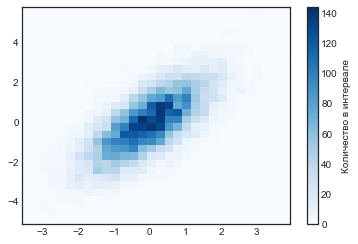

In [11]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Количество в интервале')

### Функция plt.hexbin: гексагональное разбивение по интервалам

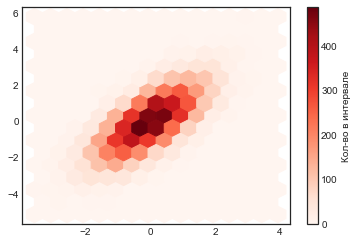

In [12]:
plt.hexbin(x, y, gridsize=15, cmap='Reds')
cb = plt.colorbar(label='Кол-во в интервале')

### Ядерная оценка плотности распределения

#### Kernel Density Estimation (KDE)

In [13]:
# размазывает точки в пространстве для получения гладкой функции

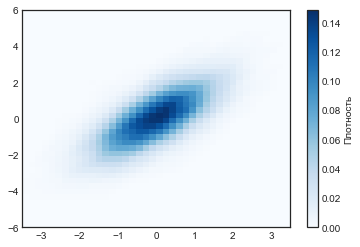

In [14]:
from scipy.stats import gaussian_kde

# выполняем подбор на массиве размера [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# вычисляем на регулярной координатной сетке
xgrid = np.linspace(-3.5, 3.5, 40) # ось х
ygrid = np.linspace(-6, 6, 40) # ось y

Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# выводим график результата в виде изображения
plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower', aspect = 'auto',
          extent = [-3.5, 3.5, -6, 6],
          cmap = 'Blues')
cb = plt.colorbar()
cb.set_label('Плотность');

## Пользовательские настройки легенд на графиках

In [15]:
import matplotlib.pyplot as plt
plt.style.use('classic')


In [16]:
%matplotlib inline
import numpy as np

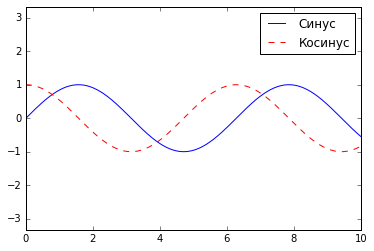

In [17]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Синус')
ax.plot(x, np.cos(x), '--r', label='Косинус')
ax.axis('equal')
leg = ax.legend();

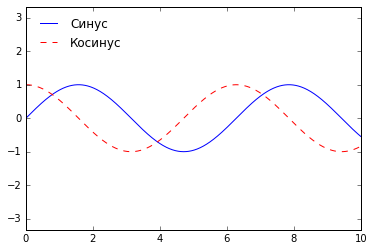

In [18]:
# зададим расположение легенды
ax.legend(loc='upper left', frameon=False)
fig

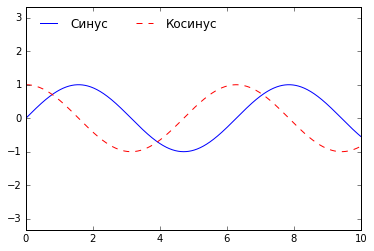

In [19]:
# зададим кол-во столбцов легенды
ax.legend(loc='upper left', frameon=False, ncol=2)
fig

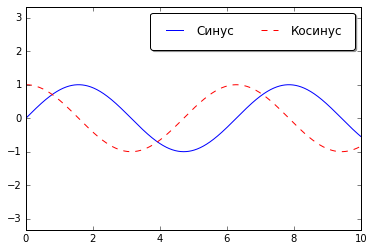

In [20]:
# зададим рамки, прозрачность, тень
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='upper right', frameon=True, ncol=2)
fig

### Выбор элементов для легенды

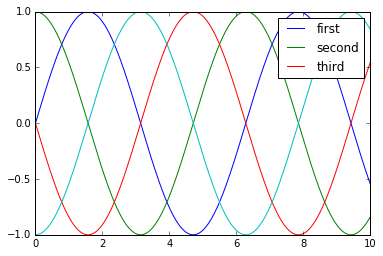

In [21]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
plt.legend(lines[:3], ['first', 'second', 'third']);

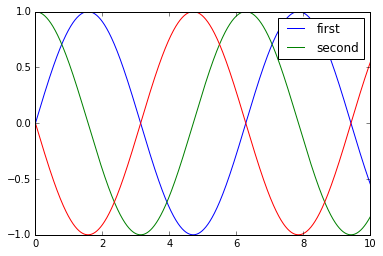

In [22]:
# непосредственно укажем метки, которые надо отобразить
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2])#, label='third')
plt.legend(framealpha=1, frameon=True);

### Задание легенды для точек различного размера

In [23]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')


In [24]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [25]:
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

(-126.0, -114.0, 32.0, 44.0)

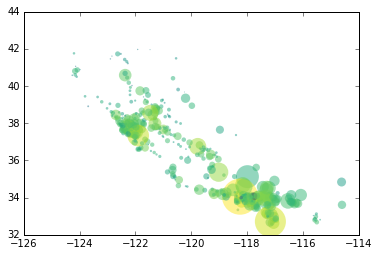

In [26]:
# распределяем точки по местам
plt.scatter(lon, lat, label=None, 
           c = np.log10(population), cmap='viridis', 
           s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')


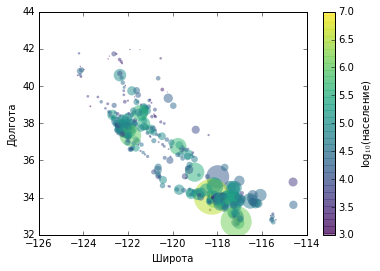

In [27]:
plt.scatter(lon, lat, label=None, 
           c = np.log10(population), cmap='viridis', 
           s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')

plt.xlabel('Широта')
plt.ylabel('Долгота')
plt.colorbar(label='log$_{10}$(население)')
plt.clim(3, 7)

Text(0.5, 1.0, 'Города Калифорнии: местоположение и население')

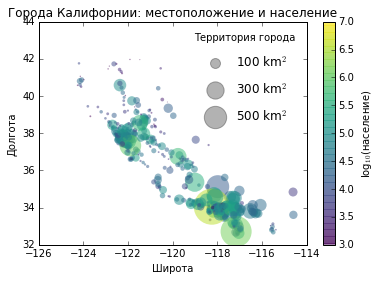

In [28]:
plt.scatter(lon, lat, label=None, 
           c = np.log10(population), cmap='viridis', 
           s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')

plt.xlabel('Широта')
plt.ylabel('Долгота')
plt.colorbar(label='log$_{10}$(население)')
plt.clim(3, 7)

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, 
               label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, 
          labelspacing=1, title='Территория города')
plt.title('Города Калифорнии: местоположение и население')